In [22]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [3]:
def remove_parantheses(column):
    for i in range(len(column)):
        column[i] = column[i].replace(')', '').replace('(', '')
    return column

## By Year

In [25]:
by_year = pd.read_csv('by_year_only.out', header = None)
by_year['Year'] = by_year[0].astype(np.int64)
by_year['Count'] = by_year[1].astype(np.int64)
by_year = by_year.drop([0, 1], 1).sort_values(by='Year')
by_year.tail(10)
#by_year.tail(10).to_csv('by_year.csv')

,Year,Count
0,2006,539024
1,2007,537201
2,2008,528675
3,2009,510946
4,2010,509725
6,2011,498198
5,2012,504128
7,2013,494958
8,2014,490363
9,2015,468576


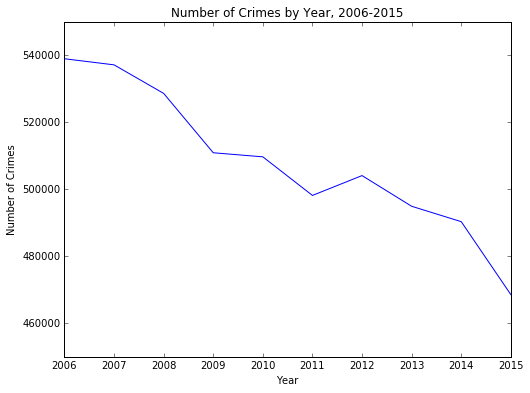

In [26]:
plt.figure(figsize=[8, 6])
plt.plot(by_year['Year'], by_year['Count'])
plt.title('Number of Crimes by Year, 2006-2015')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xlim([2006, 2015])
plt.ylim([450000, 550000])

plt.xticks(np.arange(2006, 2016), ('2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'))
plt.savefig('/Users/Brenton/Documents/NYC-crime-project/plots/crimes_by_year.png')

## By Year and Borough

In [27]:
by_boro_year = pd.read_csv('by_boro_yr.out', header = None)
by_boro_year['Borough'] = by_boro_year[0]
by_boro_year['Year'] = by_boro_year[1].astype(np.int64)
by_boro_year['Count'] = by_boro_year[2].astype(np.int64)
by_boro_year = by_boro_year.drop([0, 1, 2], 1).dropna()
by_boro_year = by_boro_year[by_boro_year['Year'] > 2005]
by_boro_year

,Borough,Year,Count
57,BRONX,2006,114329
58,BRONX,2007,117561
59,BRONX,2008,114235
60,BRONX,2009,112795
61,BRONX,2010,112169
62,BRONX,2011,108765
63,BRONX,2012,106883
64,BRONX,2013,104062
65,BRONX,2014,106016
66,BRONX,2015,102950


In [28]:
summary_2015 = by_boro_year[by_boro_year['Year'] == 2015].set_index('Borough').drop('Year', 1).rename(columns={'Count': 2015})
summary_2006 = by_boro_year[by_boro_year['Year'] == 2006].set_index('Borough').drop('Year', 1).rename(columns={'Count': 2006})
summary = pd.merge(summary_2006, summary_2015, left_index = True, right_index = True)
summary['Percent Change from 2006-2015'] = round((summary[2015] - summary[2006])/summary[2006], 4)
#summary.to_csv('crime_by_year_borough_table')
summary

,2006,2015,Percent Change from 2006-2015
Borough,,,
BRONX,114329,102950,-0.0995
BROOKLYN,160029,140351,-0.1230
MANHATTAN,129603,110580,-0.1468
QUEENS,107170,92981,-0.1324
STATEN ISLAND,27542,21714,-0.2116


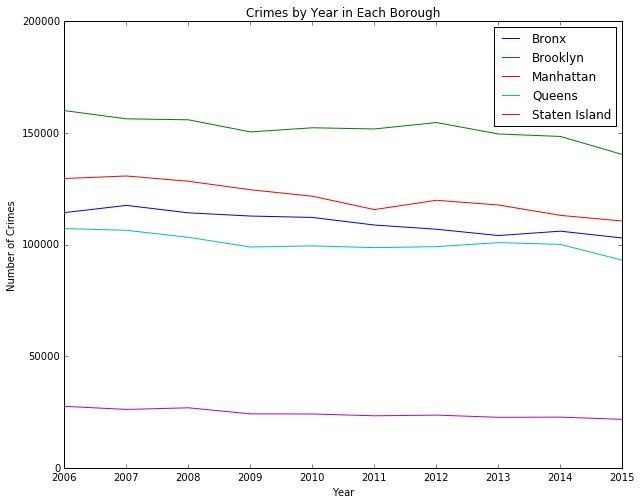

In [29]:
plt.figure(figsize = [10,8])
plt.plot()

plt.plot(by_boro_year.iloc[0:10]['Year'], by_boro_year.iloc[0:10]['Count'])
plt.plot(by_boro_year.iloc[10:20]['Year'], by_boro_year.iloc[10:20]['Count'])
plt.plot(by_boro_year.iloc[20:30]['Year'], by_boro_year.iloc[20:30]['Count'])
plt.plot(by_boro_year.iloc[30:40]['Year'], by_boro_year.iloc[30:40]['Count'])
plt.plot(by_boro_year.iloc[40:50]['Year'], by_boro_year.iloc[40:50]['Count'])

plt.title('Crimes by Year in Each Borough')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xlim([2006, 2015])
plt.ylim([0, 200000])

plt.legend(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], loc=0)
plt.xticks(np.arange(2006, 2016), ('2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'))
plt.savefig('/Users/Brenton/Documents/NYC-crime-project/plots/crimes_by_year_boro.png')

## By Year and Month 

In [30]:
by_ym = pd.read_csv('by_ym_only.out', header = None)
by_ym['Year'] = by_ym[1].astype(np.int64)
by_ym['Month'] = by_ym[2].astype(np.int64)
by_ym['Count'] = by_ym[3].astype(np.int64)
by_ym = by_ym.drop([0, 1, 2, 3], 1).tail(120) #2006-2015 is ten years, each with 12 months.
by_ym = by_ym.sort_values(by=['Year', 'Month'])

In [160]:
by_ym.head()

,Year,Month,Count
437,2006,1,45296
441,2006,2,38230
442,2006,3,45217
443,2006,4,43546
444,2006,5,46824


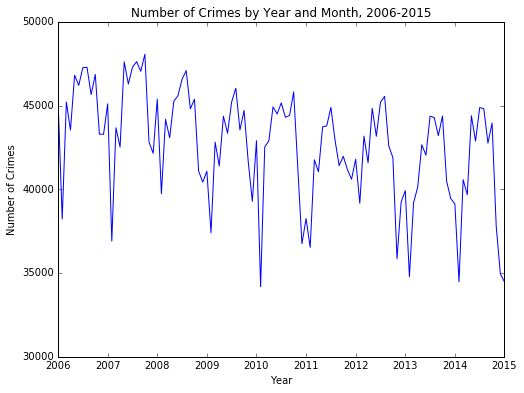

In [9]:
plt.figure(figsize=[8, 6])
plt.plot(by_ym['Year']+(by_ym['Month']-1)/12, by_ym['Count'])
plt.title('Number of Crimes by Year and Month, 2006-2015')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xlim([2006, 2015])
plt.ylim([30000, 50000])

plt.xticks(np.arange(2006, 2016), ('2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'))
plt.savefig('/Users/Brenton/Documents/NYC-crime-project/plots/crimes_by_year_month.png')

## By Month 

In [15]:
by_month = pd.read_csv('by_month_only.out', header = None)
by_month['Month'] = by_month[0].astype(np.int64)
by_month['Count'] = by_month[1].astype(np.int64)
by_month = by_month.drop([0, 1], 1).sort_values(by='Month').drop(12, 0) #drop blanks

In [16]:
by_month

,Month,Count
7,1,416073
11,2,363185
6,3,421703
8,4,415965
2,5,447946
4,6,440047
0,7,455911
1,8,455531
5,9,437906
3,10,445188


In [65]:
winter = sum(by_month.iloc[0:2]['Count']) + by_month.iloc[11]['Count']
spring = sum(by_month.iloc[2:5]['Count'])
summer = sum(by_month.iloc[5:8]['Count'])
fall = sum(by_month.iloc[8:11]['Count'])
total = winter+spring+summer+fall
seasons = ['Spring (Mar-May)', 'Summer (Jun-Aug)', 'Fall (Sept-Nov)', 'Winter (Dec-Feb)']

In [66]:
season_table = pd.DataFrame([spring, summer, fall, winter], index = seasons).rename(columns = {0: 'Count'})
#season_table.to_csv('season_table.csv')

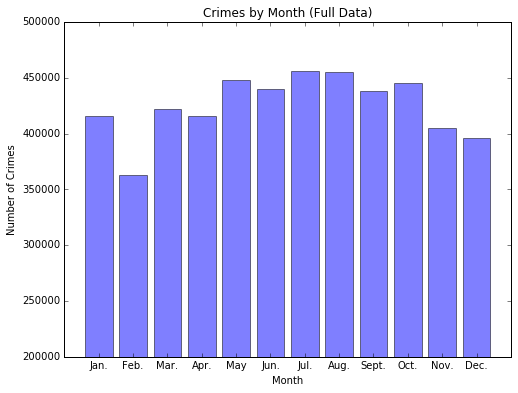

In [299]:
months = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.',
         'Sept.', 'Oct.', 'Nov.', 'Dec.']
plt.figure(figsize = [8,6])
plt.bar(np.arange(12), by_month['Count'], align='center', alpha=0.5)
plt.xticks(np.arange(12), months)
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.title('Crimes by Month (Full Data)')
plt.xlim([-1, 12])
plt.ylim([200000, 500000])
plt.savefig('/Users/Brenton/Documents/NYC-crime-project/plots/crimes_by_month.png')

## By Hour 

In [31]:
by_hour = pd.read_csv('by_hour_only.out', header = None)
by_hour['Hour'] = by_hour[0].astype(np.int64)
by_hour['Count'] = by_hour[1].astype(np.int64)
by_hour = by_hour.drop([0, 1], 1).sort_values(by='Hour').drop(24, 0)
by_hour

,Hour,Count
10,0,242407
16,1,176868
18,2,141190
19,3,118617
21,4,103641
23,5,72068
22,6,73137
20,7,104624
17,8,170462
15,9,188304


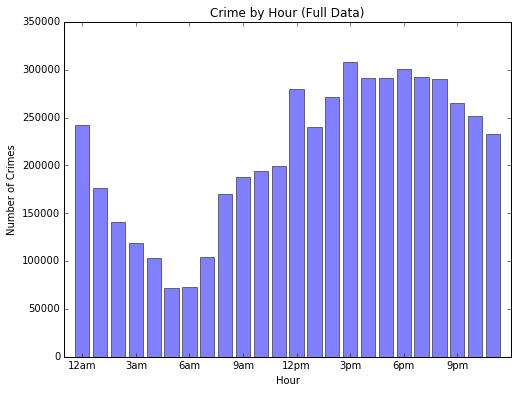

In [32]:
plt.figure(figsize = [8,6])
plt.bar(np.arange(24), by_hour['Count'], align='center', alpha=0.5)
plt.ylabel('Number of Crimes')
plt.xlabel('Hour')
plt.title('Crime by Hour (Full Data)')
plt.xlim([-1, 24])
plt.ylim([0, 350000])
plt.xticks(np.arange(0, 24, 3), ['12am', '3am', '6am', '9am', '12pm', '3pm', '6pm', '9pm'])

plt.savefig('/Users/Brenton/Documents/NYC-crime-project/plots/crimes_by_hour.png')

## By Hour and Borough 

In [34]:
by_boro_hr = pd.read_csv('by_boro_hr.out', header = None)
by_boro_hr['Borough'] = by_boro_hr[0]
by_boro_hr['Hour'] = by_boro_hr[1].astype(np.int64)
by_boro_hr['Count'] = by_boro_hr[2].astype(np.int64)
by_boro_hr = by_boro_hr.dropna().drop([0, 1, 2], 1)
by_boro_hr = by_boro_hr[(by_boro_hr['Hour'] != 24) & (by_boro_hr['Hour'] != 99)]
by_boro_hr

,Borough,Hour,Count
24,BRONX,0,51439
25,BRONX,1,37546
26,BRONX,2,28162
27,BRONX,3,22826
28,BRONX,4,19832
29,BRONX,5,15498
30,BRONX,6,16055
31,BRONX,7,22796
32,BRONX,8,35552
33,BRONX,9,37940


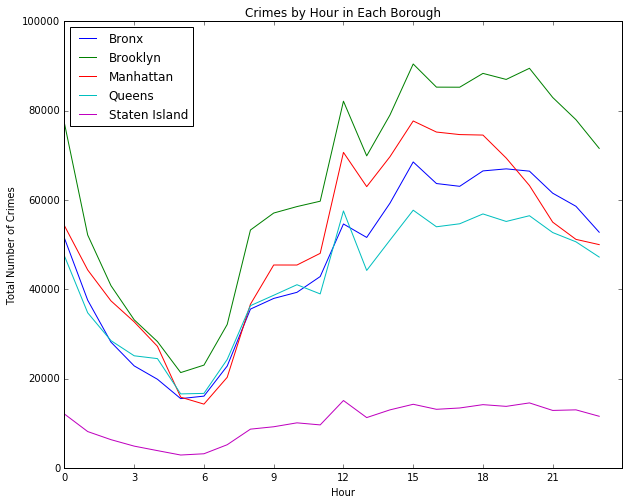

In [35]:
plt.figure(figsize = [10,8])
plt.plot()

plt.plot(by_boro_hr.iloc[0:24]['Hour'], by_boro_hr.iloc[0:24]['Count'])
plt.plot(by_boro_hr.iloc[24:48]['Hour'], by_boro_hr.iloc[24:48]['Count'])
plt.plot(by_boro_hr.iloc[48:72]['Hour'], by_boro_hr.iloc[48:72]['Count'])
plt.plot(by_boro_hr.iloc[72:96]['Hour'], by_boro_hr.iloc[72:96]['Count'])
plt.plot(by_boro_hr.iloc[96:120]['Hour'], by_boro_hr.iloc[96:120]['Count'])

plt.title('Crimes by Hour in Each Borough')
plt.xlabel('Hour')
plt.ylabel('Total Number of Crimes')
plt.xlim([0, 24])
plt.ylim([0, 100000])

plt.xticks(np.arange(0, 24, 3), ('0', '3', '6', '9', '12', '15', '18', '21'))
plt.legend(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], loc=0)
plt.savefig('/Users/Brenton/Documents/NYC-crime-project/plots/crimes_by_hour_boro.png')

## Ten days with the most crime, and ten days with the least crime. 

In [13]:
by_ymd = pd.read_csv('by_ymd_only.out', header = None)
by_ymd['Year'] = by_ymd[1].astype(np.int64)
by_ymd['Month'] = by_ymd[2].astype(np.int64)
by_ymd['Day'] = by_ymd[3].astype(np.int64)
by_ymd['Count'] = by_ymd[4].astype(np.int64)
by_ymd = by_ymd.drop([1, 2, 3, 4], 1)
by_ymd = by_ymd[by_ymd['Year'] > 2005]
not_Jan1 = by_ymd[(by_ymd['Month'] != 1) | (by_ymd['Day'] != 1)]

by_ymd = by_ymd.rename(columns={0: 'Date'}).drop(['Year', 'Month', 'Day'], 1)
not_Jan1 = not_Jan1.rename(columns={0: 'Date'}).drop(['Year', 'Month', 'Day'], 1)

In [14]:
good_days = by_ymd.sort_values(by='Count').head(10).set_index(np.arange(1, 11))
bad_days = by_ymd.sort_values(by='Count', ascending = False).head(10).set_index(np.arange(1,11))
bad_days_notJan1 = not_Jan1.sort_values(by='Count', ascending = False).head(10).set_index(np.arange(1,11))

In [15]:
good_days

,Date,Count
1,2010-12-27,450
2,2010-12-26,645
3,2015-12-31,693
4,2006-2-12,724
5,2011-8-28,738
6,2012-10-29,761
7,2010-12-25,763
8,2012-12-25,787
9,2010-12-28,788
10,2015-1-27,803


In [16]:
bad_days

,Date,Count
1,2010-1-1,2343
2,2008-1-1,2273
3,2007-1-1,2259
4,2011-1-1,2253
5,2014-1-1,2211
6,2006-1-1,2156
7,2007-8-1,2053
8,2009-1-1,2036
9,2013-1-1,2030
10,2012-1-1,2025


In [17]:
bad_days_notJan1

,Date,Count
1,2007-8-1,2053
2,2006-11-1,2016
3,2008-8-1,1968
4,2007-6-1,1958
5,2006-6-1,1954
6,2011-6-1,1930
7,2012-6-1,1906
8,2007-11-1,1905
9,2008-7-1,1879
10,2007-5-1,1867


In [18]:
#good_days.to_csv('good_days.csv')
#bad_days.to_csv('bad_days.csv')
#bad_days_notJan1.to_csv('bad_days_notJan1.csv')